In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [65]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [66]:
initial_data = yf.download("SOL-USD", start = "2021-03-01", end = "2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [67]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,13.108435,15.516057,13.057385,14.955588,14.955588,306451693
2021-03-02,14.966845,15.224125,13.460749,13.958921,13.958921,178549852
2021-03-03,13.963540,14.729359,13.767049,14.115591,14.115591,153830742
2021-03-04,14.094867,14.260361,12.771270,13.097983,13.097983,116364466
2021-03-05,13.066306,13.079862,12.184608,12.610443,12.610443,90978408


In [68]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,89.228134,94.777809,87.276161,92.598824,92.598824,3069242551
2022-02-26,92.608864,94.604332,89.757675,90.141563,90.141563,1721041901
2022-02-27,90.124634,91.989433,84.492928,85.519051,85.519051,2012522473
2022-02-28,85.501106,101.041794,84.575844,99.520348,99.520348,3457872746
2022-03-01,99.540466,101.559158,94.893425,98.653557,98.653557,3225742519


In [69]:
data =  initial_data['Adj Close']

In [70]:
initial_data['Adj Close'].head()

Date
2021-03-01    14.955588
2021-03-02    13.958921
2021-03-03    14.115591
2021-03-04    13.097983
2021-03-05    12.610443
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

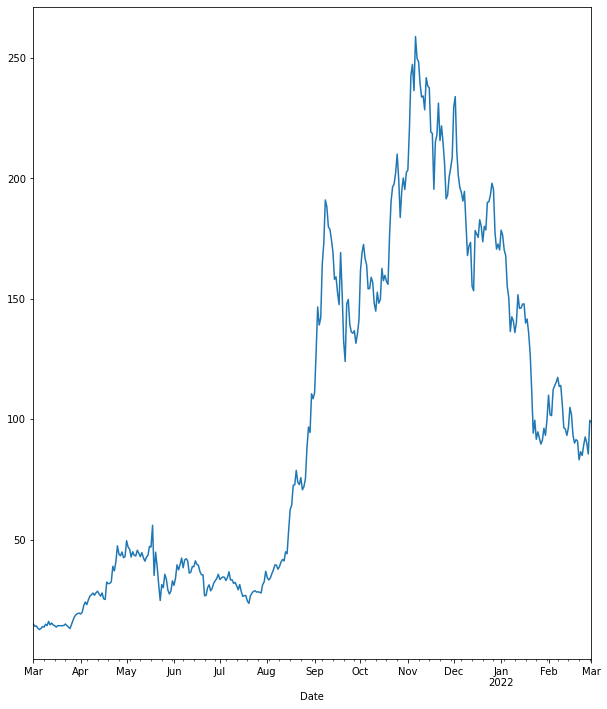

In [71]:
data.plot(figsize=(10, 12), subplots=True)

In [72]:
data.describe()

count    366.000000
mean      97.743608
std       71.084026
min       12.610443
25%       33.208401
50%       87.276184
75%      159.075340
max      258.934326
Name: Adj Close, dtype: float64

In [73]:
data.describe().round (2)

count    366.00
mean      97.74
std       71.08
min       12.61
25%       33.21
50%       87.28
75%      159.08
max      258.93
Name: Adj Close, dtype: float64

In [74]:
data.diff().head()

Date
2021-03-01         NaN
2021-03-02   -0.996667
2021-03-03    0.156670
2021-03-04   -1.017608
2021-03-05   -0.487540
Name: Adj Close, dtype: float64

In [75]:
data.diff().describe().round(2)

count    365.00
mean       0.23
std        7.13
min      -23.23
25%       -2.48
50%        0.09
75%        2.72
max       25.00
Name: Adj Close, dtype: float64

In [76]:
data.pct_change().round(4).head()

Date
2021-03-01       NaN
2021-03-02   -0.0666
2021-03-03    0.0112
2021-03-04   -0.0721
2021-03-05   -0.0372
Name: Adj Close, dtype: float64

In [77]:
data.pct_change().describe().round(4)

count    365.0000
mean       0.0080
std        0.0751
min       -0.3721
25%       -0.0357
50%        0.0011
75%        0.0420
max        0.2870
Name: Adj Close, dtype: float64

In [78]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2021-03-01       NaN
2021-03-02   -0.0690
2021-03-03    0.0112
2021-03-04   -0.0748
2021-03-05   -0.0379
Name: Adj Close, dtype: float64

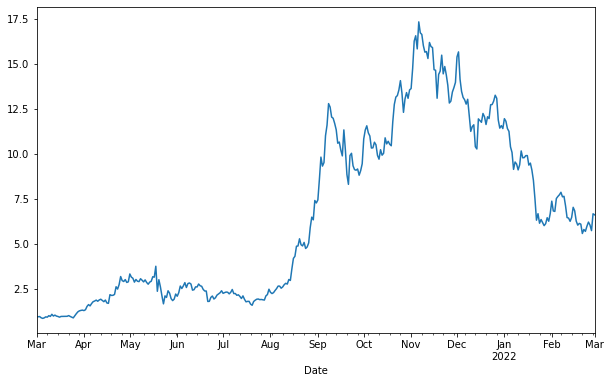

In [79]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [80]:
data.resample('1w', label='right').last().head()

Date
2021-03-07    13.877732
2021-03-14    14.508266
2021-03-21    14.332206
2021-03-28    18.016233
2021-04-04    24.061323
Freq: W-SUN, Name: Adj Close, dtype: float64

In [81]:
data.resample('1m', label='right').last().head()

Date
2021-03-31    19.465229
2021-04-30    42.956001
2021-05-31    32.816246
2021-06-30    35.556404
2021-07-31    36.827312
Freq: M, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

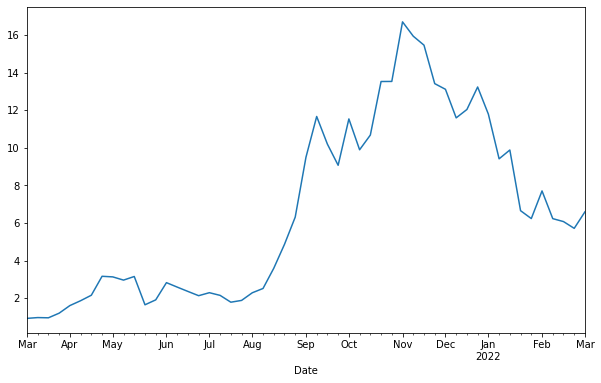

In [82]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

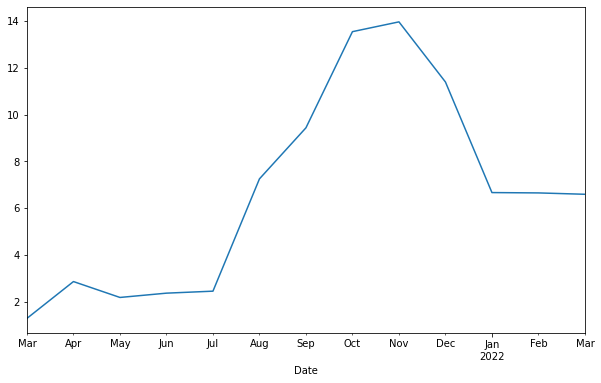

In [83]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [84]:
data= pd.DataFrame(data).dropna()
data.tail()

,Adj Close
Date,
2022-02-25,92.598824
2022-02-26,90.141563
2022-02-27,85.519051
2022-02-28,99.520348
2022-03-01,98.653557


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-03-01 to 2022-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [86]:
df=(data)
df.head()

,Adj Close
Date,
2021-03-01,14.955588
2021-03-02,13.958921
2021-03-03,14.115591
2021-03-04,13.097983
2021-03-05,12.610443


# Volatility

In [87]:
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.06664177199554829,
 0.011223619063755595,
 -0.07209104353883146,
 -0.037222542710982506,
 0.03378270662772041]

In [88]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.0689661989807534,
 0.011161101597876017,
 -0.07482165827044047,
 -0.03793298704797165,
 0.03322460567289264]

In [89]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.91513204 and its annulized volatility is 1.43408928


In [90]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 1.88652925 and its annulized volatility is 1.43455577


# binomial tree

In [30]:
import os

In [31]:
S0 = 98.65              # spot stock price
K = 120.0               # strike
T = 1/52                 # maturity 
r = 0.0164                 # risk free rate 
sig = 1.43               # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "call"          # payoff 

In [32]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [33]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [34]:
S

array([[ 98.65      , 108.93276887, 120.2873607 , 132.82549681,
        146.67054378],
       [  0.        ,  89.33787878,  98.65      , 108.93276887,
        120.2873607 ],
       [  0.        ,   0.        ,  80.90478038,  89.33787878,
         98.65      ],
       [  0.        ,   0.        ,   0.        ,  73.26772896,
         80.90478038],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         66.35158123]])

In [35]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47562908795912523

In [36]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        , 26.67054378],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2873607 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [37]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 1.42931697,  2.97126531,  6.17585624, 12.83495798, 26.67054378],
       [ 0.        ,  0.0309122 ,  0.06499736,  0.13666633,  0.2873607 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [38]:
print('European ' + payoff, str( V[0,0]))

European call 1.4293169677913444


# MONTECARLO SIMULATION

In [45]:
def mcs_simulation_np(M,I):
    M = 7 # number steps 
    I = 10000 #number of simulation
    dt = T / M #time steps for each simulation
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [46]:
T = 1/52
r = 0.0164
sigma = 1.43
S0 = 98.65
K = 120

In [47]:
S = mcs_simulation_np(7,10000)

In [48]:
S = np.transpose(S)
S

array([[ 98.65      ,  95.40799283,  81.55890604, ...,  88.61628987,
         86.44853424,  79.79365356],
       [ 98.65      , 104.22061435, 110.55365704, ...,  96.29922299,
         91.01992178, 100.41242874],
       [ 98.65      ,  98.59059557,  97.69691323, ...,  92.80291281,
         96.7065047 ,  99.35153375],
       ...,
       [ 98.65      ,  88.77380926,  97.4012097 , ...,  80.23178898,
         77.38050795,  72.61013581],
       [ 98.65      ,  98.71352644,  97.79528909, ..., 105.97644399,
        115.4780909 , 114.85392784],
       [ 98.65      ,  88.47960117,  98.42475533, ..., 110.45371921,
        107.93641723, 102.15867709]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

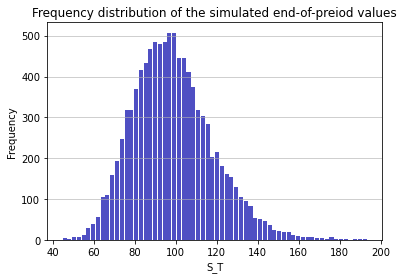

In [49]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [50]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 1.7556781846966554


# Greeks delta

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [42]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [43]:
delta(98.65, 120, 1/52, 0.0164, 0, 1.43, 'call')

0.18748677575929895

In [44]:
S = np.linspace(60, 160, 61)
T = np.linspace(0.5/52, 1/52, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 120, T[i], 0.0164, 0, 1.43, 'call')

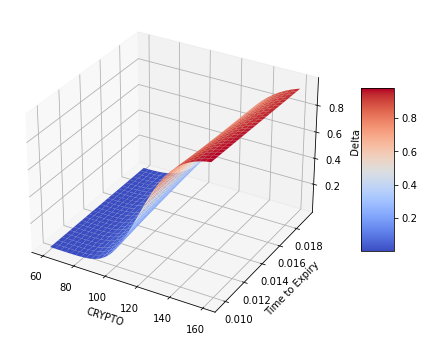

In [45]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('CRYPTO')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [46]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [47]:
gamma (98.65, 120, 1/52, 0.0164, 0, 1.43, 'call')

0.013753762814903946

In [48]:
S = np.linspace(60, 160, 61)
T = np.linspace(0.5/52, 1/52, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 120, T[i], 0.0164, 0, 1.43, 'call')

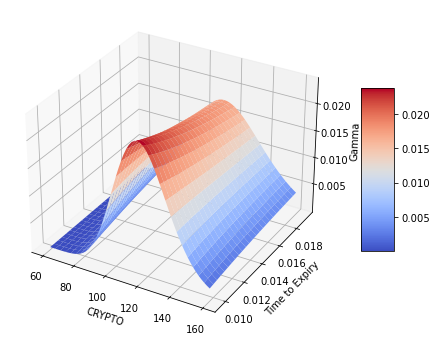

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('CRYPTO')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# theta

In [50]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [51]:
theta(98.65, 120, 1/52, 0.0164, 0, 1.43, 'call')

137.17043141095763

In [52]:
theta(98.65, 120, 1/52, 0.0164, 0, 1.43, 'put')

138.59146992921157

In [53]:
S = np.linspace(60, 160, 61)
T = np.linspace(0.5/52, 1/52, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 120, T[i], 0.0164, 0, 1.43, 'call')

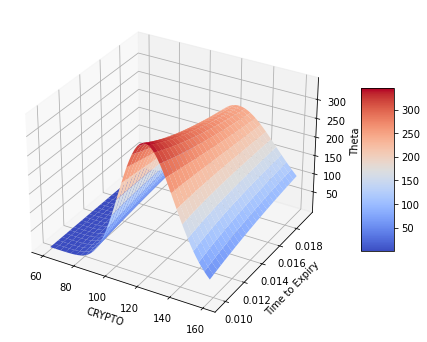

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('CRYPTO')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# vega

In [55]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [56]:
vega (98.65, 120, 1/52, 0.0164, 0, 1.43, 'call')

3.6820134739003043

In [57]:
S = np.linspace(60, 160, 61)
T = np.linspace(0.5/52, 1/52, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 120, T[i], 0.0164, 0, 1.43, 'call')

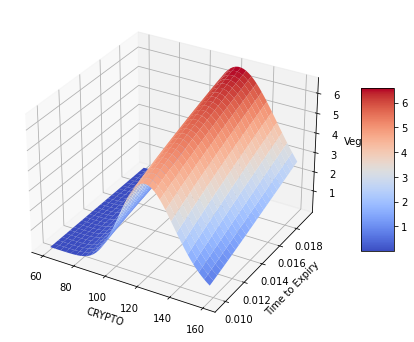

In [58]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('CRYPTO')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# RHO

In [59]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [60]:
S = np.linspace(60, 160, 61)
T = np.linspace(0.5/52, 1/52, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 120, T[i], 0.0164, 0, 1.43, 'call')

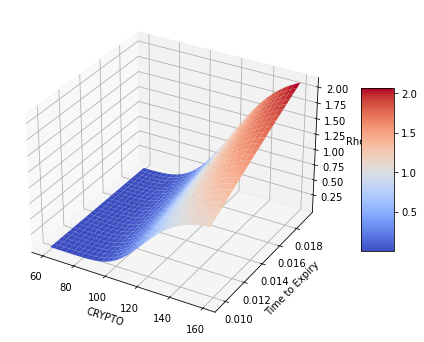

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('CRYPTO')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [62]:
rho (98.65, 120, 1/52, 0.0164, 0, 1.43, 'call')

0.3203218238090217